<a href="https://colab.research.google.com/github/Adityapatil3015/stegnography/blob/main/metal_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip
!pip install tensorflow
!pip install tensorflow-gpu
!pip install opencv-python
!pip install matplotlib
!pip install --upgrade setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/mclassifier')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 326 files belonging to 4 classes.


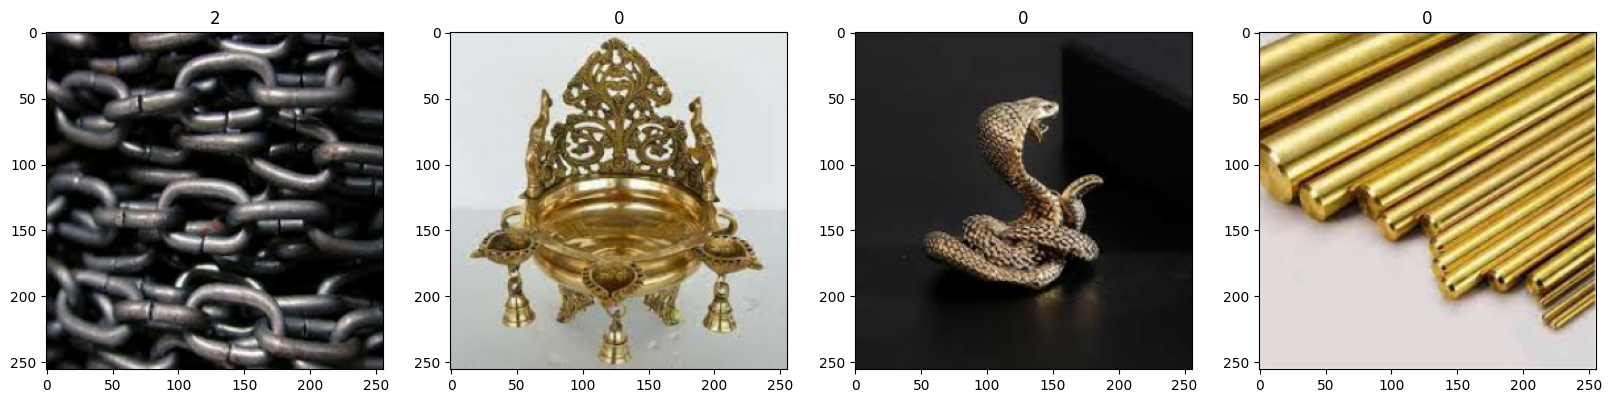

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [6]:

# Scale Data
data = data.map(lambda x, y: (x / 255, y))
data.as_numpy_iterator().next()

(array([[[[3.84313732e-01, 2.54901975e-01, 0.00000000e+00],
          [3.71476710e-01, 2.38855705e-01, 0.00000000e+00],
          [3.82299334e-01, 2.43497238e-01, 0.00000000e+00],
          ...,
          [1.00000000e+00, 9.89422500e-01, 1.00000000e+00],
          [1.00000000e+00, 9.92869198e-01, 1.00000000e+00],
          [1.00000000e+00, 9.96078432e-01, 1.00000000e+00]],
 
         [[3.81104469e-01, 2.51692712e-01, 0.00000000e+00],
          [3.68267477e-01, 2.35646442e-01, 0.00000000e+00],
          [3.81327778e-01, 2.40287989e-01, 0.00000000e+00],
          ...,
          [1.00000000e+00, 9.89422500e-01, 1.00000000e+00],
          [1.00000000e+00, 9.92869198e-01, 1.00000000e+00],
          [1.00000000e+00, 9.96078432e-01, 1.00000000e+00]],
 
         [[3.83126527e-01, 2.50980407e-01, 0.00000000e+00],
          [3.70289534e-01, 2.37171829e-01, 0.00000000e+00],
          [3.83846521e-01, 2.42310047e-01, 0.00000000e+00],
          ...,
          [1.00000000e+00, 9.92156863e-01, 1.0000

In [12]:
# Split Data
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [7]:
# Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [15]:
num_classes = 4


In [16]:
model = Sequential([
    Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Changed to softmax for multiclass
])

In [17]:
model.compile('sgd', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [18]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 16s 2s/step - loss: 1.2279 - accuracy: 0.3661 - val_loss: 1.2950 - val_accuracy: 0.3750
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: 1.1685 - accuracy: 0.4777 - val_loss: 1.2000 - val_accuracy: 0.4219
Epoch 3/20
7/7 [==============================] - 14s 2s/step - loss: 1.1259 - accuracy: 0.4643 - val_loss: 1.2589 - val_accuracy: 0.4219
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 1.0963 - accuracy: 0.5268 - val_loss: 1.1264 - val_accuracy: 0.4062
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 1.0892 - accuracy: 0.5357 - val_loss: 1.0626 - val_accuracy: 0.5156
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 1.0844 - accuracy: 0.5446 - val_loss: 1.1750 - val_accuracy: 0.5625
Epoch 7/20
7/7 [==============================] - 14s 2s/step - loss: 1.0660 - accuracy: 0.5580 - val_loss: 1.0418 - val_accuracy: 0.7500
Epoch 8/20
7/7 [==================

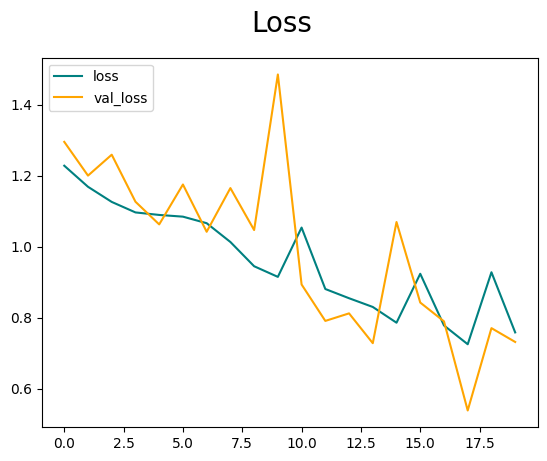

In [19]:
# Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

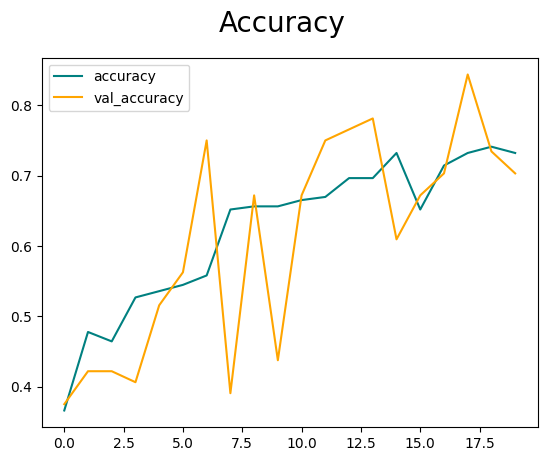

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
# Evaluate
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [22]:
accuracy_metric = SparseCategoricalAccuracy()

In [23]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    accuracy_metric.update_state(y, yhat)

1/1 [==============================] - 1s 528ms/step


In [24]:
accuracy = accuracy_metric.result().numpy()
print("Test Accuracy:", accuracy)

Test Accuracy: 0.75


**Conclusion**

One approach is to tune hyperparameters such as learning rate, batch size, and network architecture to optimize the model's accuracy.
Additionally, we explored the possibility of using a pre-trained model like VGG-16, which can potentially offer better performance, especially when dealing with limited training data.
By fine-tuning the pre-trained model on our specific dataset, we can leverage the features learned from a large dataset to improve the model's performance on our task.